In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os

## Read inputs

In [3]:
GHG =  pd.read_excel("/Users/jakob/PycharmProjects/H2_pathways_repo/data/raw/20220921_Data_Assumptions.xlsx", sheet_name='GHG Emissions', decimal=',', index_col=0)
GHG

,Parameter,Ref,1990,1991,1992,1993,1994,1995,1996,1997,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
ID,,,,,,,,,,,,,,,,,,,,,
GHG intensity of electricity generation [g CO2eq/kWh] - Germany,NaN,EEA 2022,652.0,656.0,628.0,631.0,626.0,610.0,580.0,566.0,...,62.59200,46.944000,31.296000,15.64800,0.000000,0.000000,0.000,0.000000,0.000000,0.00
GHG intensity of electricity generation [g CO2eq/kWh] - Norway,NaN,Our world in Data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.18012,3.135090,2.090060,1.04503,0.000000,0.000000,0.000,0.000000,0.000000,0.00
Grey hydrogen emissions [g CO2/MJ H2] - Norway,96.77,Own calculation @ GWP20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Grey hydrogen emissions [kg CO2/kg H2] - Norway,11.6124,Own calculation @ GWP20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Blue hydrogen emissions [g CO2/MJ H2] - Norway,NaN,Own calculation @ GWP20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,34.34300,32.479333,30.615667,28.75200,26.888333,25.024667,23.161,21.297333,19.433667,17.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Assumed load factor for compressor electricity consumption [h/a],5000,EHB 2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Assumed load factor for compressor electricity consumption [%],0.570776,EHB 2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Capacity at full load factor [GW_H2_LHV],13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
tea_lh2 = pd.read_excel("/Users/jakob/PycharmProjects/H2_pathways_repo/data/raw/20220921_Data_Assumptions.xlsx", sheet_name='LH2', decimal=',', index_col=0)
tea_lh2

,Ref,LH2,2020,2021,2022,2023,2024,2025,2026,2027,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
Properties,,,,,,,,,,,,,,,,,,,,,
Properties - Gas density [kg/m3],BOG 2020,71.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Properties - LHV [MJ/kg],BOG 2020,120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Properties - LHV [kWh/kg],https://www.iea-amf.org/content/fuel_informati...,33.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Properties - LHV [kWh/m3],https://www.rechargenews.com/energy-transitio...,2350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Properties - Boiling point at 1 Bar [°C],NaN,-253,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"CAPEX ($/kW-H2), incl. Util.",EWI PTX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"OPEX ($/kW-H2/a), incl. Util.",EWI PTX,NaN,57.69591,57.118951,56.541992,55.965033,55.388074,54.811115,54.234156,53.657197,...,37.646582,36.348424,35.050266,33.752108,32.45395,31.155792,29.857634,28.559476,27.261318,25.96316
Electricity use (kWh/kWh-H2,EWI PTX,0.01,0.01000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,...,0.010000,0.010000,0.010000,0.010000,0.01000,0.010000,0.010000,0.010000,0.010000,0.01000


In [5]:
tra_d = pd.read_excel("/Users/jakob/PycharmProjects/H2_pathways_repo/data/raw/20220921_Data_Assumptions.xlsx", sheet_name='Transport Distances', decimal=',')
tra_d

,Origin_Country,Destination_Country,sea distance (km),onshore distance (km),offshore distance (km),Starting point
0,United Arab Emirates,Germany,12443.10,NaN,NaN,NaN
1,Angola,Germany,9809.65,NaN,NaN,NaN
2,Argentina,Germany,14063.90,NaN,NaN,NaN
3,Austria,Germany,6005.96,500.0,0.0,NaN
4,Australia,Germany,21212.10,NaN,NaN,NaN
...,...,...,...,...,...,...
955,Philippines,China,1782.35,NaN,NaN,NaN
956,Iceland,China,20454.60,NaN,NaN,NaN
957,Papua New Guinea,China,6298.52,NaN,NaN,NaN
958,Cameroon,China,19717.70,NaN,NaN,NaN


In [6]:
# Onshore pipeline distance between two countries [km]
d_on = float(tra_d[(tra_d['Origin_Country'] == 'Norway') & (tra_d['Destination_Country'] == 'Germany')]['onshore distance (km)'].values)
d_on

300.0

In [7]:
# Offshore pipeline distance between two countries [km]
d_off = float(tra_d[(tra_d['Origin_Country'] == 'Norway') & (tra_d['Destination_Country'] == 'Germany')]['offshore distance (km)'].values)
d_off

650.0

In [8]:
# Compression capacity in [MWel/1000km]
capa_comp = float(GHG.loc['Medium - Compression capacity @ 48inch [MW_el/1000km]']['Parameter'])
capa_comp

260.0

In [9]:
# Utilisation of the pipeline in %
pipe_use = float(GHG.loc['Pipeline load factor [%]']['Parameter'])
pipe_use

0.75

In [10]:
#Capacity at full load factor [kg H2/a]
capa_pipe = float(GHG.loc['Capacity at full load factor [kg H2/a]']['Parameter'])
capa_pipe

2033571428.5714285

# Pipeline transport

Compression capacity in [MWel/1000km]
Utilisation of the pipeline in %
8760 h/a
Capacity at full load factor [kg H2/a]
Transport distance in [km]


In [11]:
# Calc. energy use for compression [kWh/kg_H2]
en_comp = capa_comp * 1000 * pipe_use * 8760 / capa_pipe / 1000 * (d_on + d_off)
en_comp

0.7979999999999999

Energy use per kg H2 delivered times emission factor for energy use.
en_comp = Total energy use for compression [kWh/kg H2]
EF_y_n = Emission factor of used energy in year y and country n [g CO2eq/kWh]

In [12]:
def Pipeline_emissions():

    result = en_comp * EF_y_n
    return result

Calc. pipeline emissions over time

Using grid electricity for compression.
Compressor station for subsea pipelines in exporting country.
Emission factor for grid electricity in year y and country n [g CO2eq/kWh]
Energy use for compression in [kWh/kg H2]

In [13]:
years = np.arange(2025,2051)
result = pd.DataFrame(index=years, columns=['Pipeline_emissions'])
result.index.name = 'Years'

for year in years:

    EF_y_n = float(GHG.loc['GHG intensity of electricity generation [g CO2eq/kWh] - Germany'][year])

    result.Pipeline_emissions.loc[year] = Pipeline_emissions()

result

,Pipeline_emissions
Years,
2025,259.154933
2026,243.744667
2027,228.3344
2028,212.924133
2029,197.513867
2030,182.1036
2031,170.136792
2032,158.169984
2033,146.203176


Plot emission breakdown for pipeline transport

# LH2 transport

Liquefaction energy use

Electricity use for liquefaction in [kWh/kg H2]
Emission factor for grid electricity in year y and country n [g CO2eq/kWh]


## Liquefaction

In [15]:
def Conversion_emissions():
    result = el_liq_y * EF_y_n
    return result

In [16]:
# Calc. liquefaction emissions over time [g CO2eq/kg H2]
years = np.arange(2025, 2051)
result = pd.DataFrame(index=years, columns=['LH2_Conversion_emissions'])
for year in years:
    el_liq_y = float(tea_lh2.loc['Liquefaction - Electricity consumption opt. [kWh/kgH2]'][year])
    EF_y_n = float(GHG.loc['GHG intensity of electricity generation [g CO2eq/kWh] - Norway'][year])

    result.LH2_Conversion_emissions.loc[year] = Conversion_emissions()

result

,LH2_Conversion_emissions
2025,177.655121
2026,166.786808
2027,156.127501
2028,145.677199
2029,135.435904
2030,125.403615
2031,115.580332
2032,105.966055
2033,96.560784
2034,87.364518


In [17]:
path=r'/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed'
output_file = os.path.join(path,'LH2_Conversion_emissions.csv')
result.to_csv(output_file, sep = ';')

## Export terminal

In [18]:
# Electricity consumption for the export terminal [kWh/kg_h2]
el_et = float(tea_lh2.loc['Export Terminal - Electricity use [kWh/kgH2]']['LH2'])
el_et

0.61

In [19]:
el_reliq = float(tea_lh2.loc['Export Terminal - Energy use to reliquefy opt. [kWh/kg H2/day]']['LH2'])
el_reliq

0.1

In [20]:
# Average storage time in the export terminal tanks in days
t_et = float(tea_lh2.loc['Export Terminal - Storage length per load [Days]']['LH2'])
t_et

7.0

In [21]:
def ET_emissions():
    result = (el_et + el_reliq * t_et) * EF_y_n
    return result

In [22]:
# Calc. liquefaction emissions over time [g CO2eq/kg H2]
years = np.arange(2025, 2051)
result = pd.DataFrame(index=years, columns=['LH2_Export_terminal_emissions'])
result.index.name = 'Years'

for year in years:
    EF_y_n = float(GHG.loc['GHG intensity of electricity generation [g CO2eq/kWh] - Norway'][year])

    result.LH2_Export_terminal_emissions.loc[year] = ET_emissions()

result

,LH2_Export_terminal_emissions
Years,
2025,27.379789
2026,26.0108
2027,24.64181
2028,23.272821
2029,21.903831
2030,20.534842
2031,19.165852
2032,17.796863
2033,16.427874


In [23]:
path=r'/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed'
output_file = os.path.join(path,'LH2_Export_terminal_emissions.csv')
result.to_csv(output_file, sep = ';')

In [24]:
et_em = pd.read_csv('/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed/LH2_Export_Terminal_emissions.csv', delimiter=';', decimal=',', index_col= 0)
et_em

,LH2_Export_terminal_emissions
Years,
2025,27.379789274999997
2026,26.01079981125
2027,24.641810347499998
2028,23.272820883749997
2029,21.903831419999996
2030,20.534841956249995
2031,19.165852492499997
2032,17.796863028749996
2033,16.427873564999995


## Shipping

Calc. emission factor for cargo/fuel

In [124]:
# Cost of transported hydrogen in [$/kg_h2] in year y
LH2_Conversion_emissions = pd.read_csv(
    "/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed/LH2_Conversion_emissions.csv", delimiter=';',
    decimal=',', index_col=0)
LH2_Export_terminal_emissions = pd.read_csv(
    "/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed/LH2_Export_terminal_emissions.csv", delimiter=';',
    decimal=',', index_col=0)

In [125]:
# Emissions of transported hydrogen carrier in [g CO2eq/kg_H2] in year y
H2_emissions = (GHG.loc['Blue hydrogen emissions [kg CO2/kg H2] - Norway', 2025:2050]).apply(pd.to_numeric) * 1000
Con_emissions = (LH2_Conversion_emissions.loc[::]['LH2_Conversion_emissions']).apply(pd.to_numeric)
ET_emissions = (LH2_Export_terminal_emissions.loc[::]['LH2_Export_terminal_emissions']).apply(pd.to_numeric)

In [126]:
# Emission of cargo in [g CO2eq/kg_H2]
LH2_cargo_emissions = (H2_emissions + Con_emissions + ET_emissions).to_frame('LH2_cargo_emissions')
LH2_cargo_emissions

,LH2_cargo_emissions
2025,7904.434911
2026,7668.557608
2027,7432.889311
2028,7197.430020
2029,6962.179736
2030,6727.138457
2031,6492.306184
2032,6257.682918
2033,6023.268657
2034,5789.063403


In [127]:
path=r'/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed'
output_file = os.path.join(path,'LH2_cargo_emissions.csv')
result.to_csv(output_file, sep = ';')

In [128]:
# Boil-off when shipping in [%/day] to [%/hour]
bog_ship = float(tea_lh2.loc['Shipping - Boil off opt. [%/day]']['LH2']) / 24
bog_ship

8.333333333333333e-05

In [129]:
# Fuel consumption of a ship in [kg_h2/t/km]
f_ship = float(tea_lh2.loc['Shipping - Fuel use [kg H2/t/km]']['LH2']) / 1000
f_ship

1.1265151515151516e-06

In [130]:
# Distance between countries via ship in [km]
d_sea = float(tra_d[(tra_d['Origin_Country'] == 'Norway') & (tra_d['Destination_Country'] == 'Germany')][
                  'sea distance (km)'].values)
d_sea

602.403

In [131]:
# Ship speed in [km/h]
v_ship = float(tea_lh2.loc['Shipping - Ship speed [km/h]']['LH2'])
v_ship

30.0

In [132]:
# Cost of transported hydrogen in [$/kg_h2] in year y
LH2_Conversion_emissions = pd.read_csv(
    "/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed/LH2_Conversion_emissions.csv", delimiter=';',
    decimal=',', index_col=0)
LH2_Export_terminal_emissions = pd.read_csv(
    "/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed/LH2_Export_terminal_emissions.csv", delimiter=';',
    decimal=',', index_col=0)
# Emissions of transported hydrogen carrier in [g CO2eq/kg_H2] in year y
H2_emissions = (GHG.loc['Blue hydrogen emissions [kg CO2/kg H2] - Norway', 2025:2050]).apply(pd.to_numeric) * 1000
Con_emissions = (LH2_Conversion_emissions.loc[::]['LH2_Conversion_emissions']).apply(pd.to_numeric)
ET_emissions = (LH2_Export_terminal_emissions.loc[::]['LH2_Export_terminal_emissions']).apply(pd.to_numeric)
# Emission of cargo in [g CO2eq/kg_H2]
LH2_cargo_emissions = (H2_emissions + Con_emissions + ET_emissions).to_frame('LH2_cargo_emissions')
LH2_cargo_emissions

,LH2_cargo_emissions
2025,7904.434911
2026,7668.557608
2027,7432.889311
2028,7197.430020
2029,6962.179736
2030,6727.138457
2031,6492.306184
2032,6257.682918
2033,6023.268657
2034,5789.063403


In [133]:
#d_sea = 10000

Calc. LH2 shipping emissions

In [134]:
def calculate_ship_emissions():
    result = 1/(1-(bog_ship * d_sea/v_ship) - (f_ship  * d_sea)) \
             + (bog_ship * d_sea/v_ship + f_ship * d_sea) * LH2_cargo_ghg

    return result

In [135]:
# Calculation of shipping emissions [g CO2eq/kg_h2] from 2025 to 2050.
years = np.arange(2025, 2051)
result = pd.DataFrame(index=years, columns=['LH2_Shipping_emissions'])
result.index.name = 'Years'

for year in years:

    LH2_cargo_ghg = float(LH2_cargo_emissions.loc[year]['LH2_cargo_emissions'])

    # calculate emissions of specific year
    result.LH2_Shipping_emissions.loc[year] = calculate_ship_emissions()

result

,LH2_Shipping_emissions
Years,
2025,19.593255
2026,19.038481
2027,18.484199
2028,17.930409
2029,17.37711
2030,16.824303
2031,16.271988
2032,15.720163
2033,15.168831


In [136]:
path=r'/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed'
output_file = os.path.join(path,'LH2_Shipping_emissions.csv')
result.to_csv(output_file, sep = ';')

## Import terminal


In [137]:
# Electricity consumption for the import terminal [kWh/kg_h2]
el_it = float(tea_lh2.loc['Import Terminal - Electricity use [kWh/kg H2]']['LH2'])
el_it

0.2

In [138]:
# Electricity consumption to reliquefy BOG [kWh/kg_h2]
el_reliq = float(tea_lh2.loc['Import Terminal - Energy use to reliquefy opt. [kWh/kg H2/day]']['LH2'])
el_reliq

0.1

In [139]:
# Average storage time in the import terminal tanks in days
t_it = float(tea_lh2.loc['Import Terminal - Storage length per load [days]']['LH2'])
t_it

7.0

In [140]:
def IT_emissions():
    result = (el_it + el_reliq * t_it) * EF_y_n
    return result


# Calc. liquefaction emissions over time [g CO2eq/kg H2]
years = np.arange(2025, 2051)
result = pd.DataFrame(index=years, columns=['LH2_Import_terminal_emissions'])
result.index.name = 'Years'

for year in years:
    EF_y_n = float(GHG.loc['GHG intensity of electricity generation [g CO2eq/kWh] - Germany'][year])

    result.LH2_Import_terminal_emissions.loc[year] = IT_emissions()

result

,LH2_Import_terminal_emissions
Years,
2025,292.28
2026,274.9
2027,257.52
2028,240.14
2029,222.76
2030,205.38
2031,191.8836
2032,178.3872
2033,164.8908


In [141]:
path = r'/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed'
output_file = os.path.join(path, 'LH2_Import_terminal_emissions.csv')
result.to_csv(output_file, sep=';')

## Reconversion


In [190]:
def calculate_recon_emissions():
    result = el_recon_y * EF_y_n
    return result

In [191]:
years = np.arange(2025, 2051)
result = pd.DataFrame(index=years, columns=['LH2_Reconversion_emissions'])
result.index.name = 'Years'

In [192]:
for year in years:

    el_recon_y = float(tea_lh2.loc['Reconversion - Electricity consumption opt. [kWh/kg H2]'][year])
    EF_y_n = float(GHG.loc['GHG intensity of electricity generation [g CO2eq/kWh] - Germany'][year])

    # calculate emissions of specific year
    result.LH2_Reconversion_emissions.loc[year] = calculate_recon_emissions()
result

,LH2_Reconversion_emissions
Years,
2025,227.328889
2026,207.702222
2027,188.848
2028,170.766222
2029,153.456889
2030,136.92
2031,123.65832
2032,110.99648
2033,98.93448


In [193]:
path = r'/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed'
output_file = os.path.join(path, 'LH2_Reconversion_emissions.csv')
result.to_csv(output_file, sep=';')

## Total LH2 transport emissions

In [195]:
con_em = pd.read_csv('/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed/LH2_Conversion_emissions.csv', delimiter=';', decimal=',', index_col= 0)
et_em = pd.read_csv('/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed/LH2_Export_terminal_emissions.csv', delimiter=';', decimal=',', index_col= 0)
ship_em = pd.read_csv('/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed/LH2_Shipping_emissions.csv', delimiter=';', decimal=',', index_col= 0)
it_em = pd.read_csv('/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed/LH2_Import_terminal_emissions.csv', delimiter=';', decimal=',', index_col= 0)
recon_em = pd.read_csv('/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed/LH2_Reconversion_emissions.csv', delimiter=';', decimal=',', index_col= 0)

In [196]:
years = np.arange(2025, 2051)
result = pd.DataFrame(index=years, columns=['LH2_transport_emissions'])
result.index.name = 'Years'

In [197]:
# [g CO2eq/kg H2]
def calculate_LH2_transport_emissions():
    result = CE + EE + SE + IE + RE

    return result

In [201]:
for year in years:
    # get all emissions
    CE = float(con_em.loc[year]['LH2_Conversion_emissions'])
    EE = float(et_em.loc[year]['LH2_Export_terminal_emissions'])
    SE = float(ship_em.loc[year]['LH2_Shipping_emissions'])
    IE = float(it_em.loc[year]['LH2_Import_terminal_emissions'])
    RE = float(recon_em.loc[year]['LH2_Reconversion_emissions'])
    # calculate costs of specific year
    result.LH2_transport_emissions.loc[year] = calculate_LH2_transport_emissions()

result

,LH2_transport_emissions
Years,
2025,744.237054
2026,694.438311
2027,645.62151
2028,597.786652
2029,550.933735
2030,505.06276
2031,466.560092
2032,428.866761
2033,391.982768


In [202]:
# export result to excel
from openpyxl import load_workbook
path = '/Users/jakob/PycharmProjects/H2_pathways_repo/data/Results/Results.xlsx'

writer = pd.ExcelWriter(path, engine='openpyxl', mode='a', if_sheet_exists = 'replace')
book = load_workbook(path)
writer.book = book
writer.sheets = dict((ws.title, ws) for ws in book.worksheets)

result.to_excel(writer, sheet_name='LH2 Emissions')
book.save('/Users/jakob/PycharmProjects/H2_pathways_repo/data/Results/Results.xlsx')

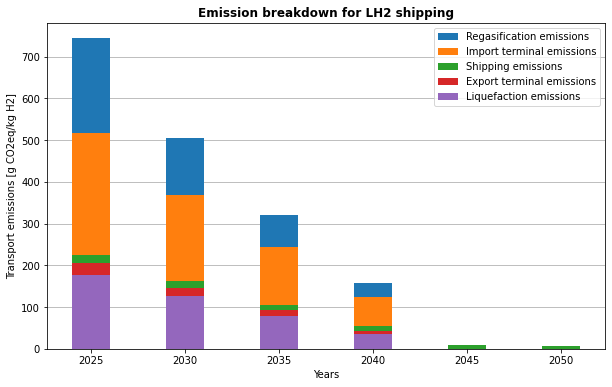

In [199]:
# Emission breakdown for LH2 seaborne transport
fig, ax = plt.subplots(figsize=(10,6))
plt.grid(True, axis = 'y')
ax.set_axisbelow(True)
x = np.arange(2025, 2051, step=5)
CE = (con_em.loc[::5]['LH2_Conversion_emissions']).apply(pd.to_numeric)
EE = (et_em.loc[::5]['LH2_Export_terminal_emissions']).apply(pd.to_numeric)
SE = (ship_em.loc[::5]['LH2_Shipping_emissions']).apply(pd.to_numeric)
IE = (it_em.loc[::5]['LH2_Import_terminal_emissions']).apply(pd.to_numeric)
RE = (recon_em.loc[::5]['LH2_Reconversion_emissions']).apply(pd.to_numeric)
width = 2       # the width of the bars: can also be len(x) sequence

RE_plt = plt.bar(x,RE, width, label='Regasification emissions', bottom= CE + EE + SE + IE)
IE_plt = plt.bar(x,IE, width, label='Import terminal emissions', bottom= CE + EE + SE)
SE_plt = plt.bar(x,SE, width, label='Shipping emissions', bottom= CE + EE)
EE_plt = plt.bar(x,EE, width, label='Export terminal emissions', bottom= CE)
CE_plt = plt.bar(x,CE, width, label='Liquefaction emissions')

plt.title('Emission breakdown for LH2 shipping', fontweight='bold')
plt.legend(loc='upper right')
plt.ylabel('Transport emissions [g CO2eq/kg H2]')
plt.xlabel('Years')
plt.show()

@ 10.000 km shipping distance. Large contributers to total emissions are emissions factors for grid electricity in import/exporting countries (assumed zero from 2045).

# NH3 transport

In [151]:
tea_lnh3 = pd.read_excel("/Users/jakob/PycharmProjects/H2_pathways_repo/data/raw/20220921_Data_Assumptions.xlsx", sheet_name='LNH3', decimal=',', index_col=0)
tea_lnh3

,Ref,NH3,2020,2021,2022,2023,2024,2025,2026,2027,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
Properties,,,,,,,,,,,,,,,,,,,,,
Properties - Gas density [kg/m3],NaN,682.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Properties - LHV [MJ/kg] [],BOG 2020,18.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Properties - LHV [kWh/kg],https://www.iea-amf.org/content/fuel_informati...,5.17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Properties - LHV [kWh/m3],https://www.rechargenews.com/energy-transitio...,3730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Properties - Boiling point at 1 Bar [°C],NaN,-33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Reconversion - Efficiency [% LHV],IRENA 2022,NaN,0.98,0.980,0.98,0.980,0.98,0.980,0.98,0.980,...,0.98,0.98,0.98,0.98,0.98,0.98,0.98,0.98,0.98,0.98
Reconversion - Electricity consumption opt. [kWh/kg H2],IRENA 2022,NaN,2.75,2.675,2.6,2.525,2.45,2.375,2.30,2.225,...,1.20,1.15,1.10,1.05,1.00,0.95,0.90,0.85,0.80,0.75
Reconversion - Electricity consumption pess. [kWh/kg H2],IRENA 2022,NaN,2.75,2.675,2.6,2.525,2.45,2.375,2.30,2.225,...,1.20,1.15,1.10,1.05,1.00,0.95,0.90,0.85,0.80,0.75


## Conversion emissions

In [152]:
def Conversion_emissions():
    result = el_con_y * EF_y_n
    return result

In [153]:
# Calc. liquefaction emissions over time [g CO2eq/kg H2]
years = np.arange(2025, 2051)
result = pd.DataFrame(index=years, columns=['NH3_Conversion_emissions'])
for year in years:
    el_con_y = float(tea_lnh3.loc['Conversion - Electricity consumption opt. [kWh/kgH2]'][year])
    EF_y_n = float(GHG.loc['GHG intensity of electricity generation [g CO2eq/kWh] - Norway'][year])

    result.NH3_Conversion_emissions.loc[year] = Conversion_emissions()

result

,NH3_Conversion_emissions
2025,89.872591
2026,85.378961
2027,80.885332
2028,76.391702
2029,71.898073
2030,67.404443
2031,61.447771
2032,55.700106
2033,50.161446
2034,44.831792


In [154]:
path = r'/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed'
output_file = os.path.join(path, 'NH3_Conversion_emissions.csv')
result.to_csv(output_file, sep=';')

## Export terminal

In [155]:
# Electricity consumption for the export terminal [kWh/kg_h2]
el_et_nh3 = float(tea_lnh3.loc['Export Terminal - Electricity use [kWh/kgH2]']['NH3'])
el_et_nh3

0.005

In [156]:
el_reliq_nh3 = float(tea_lnh3.loc['Export Terminal - Energy use to reliquefy opt. [kWh/kg NH3/day]']['NH3'])
el_reliq_nh3

0.0378

In [157]:
#Lower heating value of Nh3[ kWh / kg]
NH3_lhv = float(tea_lnh3.loc['Properties - LHV [kWh/kg]']['NH3'])
NH3_lhv
#Lower heating value of H2 [kWh/kg]
H2_lhv = 33.33

same storage time as for LH2

In [158]:
# Average storage time in the export terminal tanks in days
t_et

7.0

In [159]:
def ET_emissions():
    result = (el_et_nh3 + el_reliq_nh3 * (NH3_lhv/H2_lhv) * t_et) * EF_y_n
    return result

In [160]:
# Calc. liquefaction emissions over time [g CO2eq/kg H2]
years = np.arange(2025, 2051)
result = pd.DataFrame(index=years, columns=['NH3_Export_terminal_emissions'])
result.index.name = 'Years'

In [161]:
for year in years:
    EF_y_n = float(GHG.loc['GHG intensity of electricity generation [g CO2eq/kWh] - Norway'][year])

    result.NH3_Export_terminal_emissions.loc[year] = ET_emissions()

result

,NH3_Export_terminal_emissions
Years,
2025,0.962338
2026,0.914221
2027,0.866104
2028,0.817988
2029,0.769871
2030,0.721754
2031,0.673637
2032,0.62552
2033,0.577403


In [162]:
path = r'/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed'
output_file = os.path.join(path, 'NH3_Export_terminal_emissions.csv')
result.to_csv(output_file, sep=';')

In [163]:
result

,NH3_Export_terminal_emissions
Years,
2025,0.962338
2026,0.914221
2027,0.866104
2028,0.817988
2029,0.769871
2030,0.721754
2031,0.673637
2032,0.62552
2033,0.577403


## Shipping

In [164]:
# Emissions of transported hydrogen carrier in [g CO2/kg_h2] in year y
NH3_Conversion_emissions = pd.read_csv(
    "/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed/NH3_Conversion_emissions.csv", delimiter=';',
    decimal=',', index_col=0)
NH3_Export_terminal_emissions = pd.read_csv(
    "/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed/NH3_Export_terminal_emissions.csv", delimiter=';',
    decimal=',', index_col=0)

In [165]:
# Boil-off when shipping in [%/day] to [%/hour]
bog_ship = float(tea_lnh3.loc['Shipping - Boil off opt. [%/day]']['NH3']) / 24 * (NH3_lhv/H2_lhv)
bog_ship

0.0001615786578657866

In [166]:
# Fuel consumption of a ship in [kg_h2/t/km]
f_ship = float(tea_lnh3.loc['Shipping - Fuel use [kg NH3/t/km]']['NH3']) / 1000 * (NH3_lhv/H2_lhv)
f_ship

3.933746996123837e-07

d_sea and v_ship are equivalent to LH2 transport

Calc. emission factor for cargo/fuel

In [167]:
# Emissions of transported hydrogen carrier in [g CO2eq/kg_H2] in year y
H2_emissions = (GHG.loc['Blue hydrogen emissions [kg CO2/kg H2] - Norway', 2025:2050]).apply(pd.to_numeric) * 1000
Con_emissions = (NH3_Conversion_emissions.loc[::]['NH3_Conversion_emissions']).apply(pd.to_numeric)
ET_emissions = (NH3_Export_terminal_emissions.loc[::]['NH3_Export_terminal_emissions']).apply(pd.to_numeric)
# Emission of cargo in [g CO2eq/kg_H2]
NH3_cargo_emissions = (H2_emissions + Con_emissions + ET_emissions).to_frame('NH3_cargo_emissions')
NH3_cargo_emissions

,NH3_cargo_emissions
2025,7790.234929
2026,7562.053183
2027,7333.871436
2028,7105.689690
2029,6877.507943
2030,6649.326197
2031,6419.681408
2032,6190.245626
2033,5961.018849
2034,5732.001078


In [168]:
path = r'/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed'
output_file = os.path.join(path, 'NH3_cargo_emissions.csv')
result.to_csv(output_file, sep=';')

In [169]:
#d_sea = 10000

In [170]:
# Calc.NH3 shipping emissions
def calculate_ship_emissions():
    result = 1 / (1 - (bog_ship * d_sea / v_ship) - (f_ship * d_sea))\
             + (bog_ship * d_sea / v_ship + f_ship * d_sea) * NH3_cargo_ghg
    return result

In [171]:
# Calculation of shipping emissions [g CO2eq/kg_h2] from 2025 to 2050.
years = np.arange(2025, 2051)
result = pd.DataFrame(index=years, columns=['NH3_Shipping_emissions'])
result.index.name = 'Years'

for year in years:
    NH3_cargo_ghg = float(LH2_cargo_emissions.loc[year]['LH2_cargo_emissions'])
    f_ship = float(tea_lnh3.loc['Shipping - Fuel use [kg NH3/t/km]'][year])/1000 * (NH3_lhv/H2_lhv)
    # calculate emissions of specific year
    result.NH3_Shipping_emissions.loc[year] = calculate_ship_emissions()

result

,NH3_Shipping_emissions
Years,
2025,28.522671
2026,27.701467
2027,26.880992
2028,26.061243
2029,25.242223
2030,24.42393
2031,23.57559
2032,22.730202
2033,21.887763


In [172]:
path = r'/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed'
output_file = os.path.join(path, 'NH3_Shipping_emissions.csv')
result.to_csv(output_file, sep=';')

## Import terminal

In [173]:
# Electricity consumption for the import terminal [kWh/kg_h2]
el_it = float(tea_lnh3.loc['Import Terminal - Electricity use [kWh/kg H2]']['NH3'])
el_it

0.02

In [174]:
# Electricity consumption to reliquefy BOG [kWh/kg_h2]
el_reliq = float(tea_lnh3.loc['Import Terminal - Energy use to reliquefy opt. [kWh/kg NH3/day]']['NH3'])
el_reliq

0.0378

In [175]:

# Average storage time in the import terminal tanks in days
t_it = float(tea_lnh3.loc['Import Terminal - Storage length per load [days]']['NH3'])
t_it

7.0

In [176]:
def IT_emissions():
    result = (el_it + el_reliq * (NH3_lhv/H2_lhv) * t_it) * EF_y_n
    return result

In [177]:
# Calc. import terimal emissions over time [g CO2eq/kg H2]
years = np.arange(2025, 2051)
result = pd.DataFrame(index=years, columns=['NH3_Import_terminal_emissions'])
result.index.name = 'Years'

for year in years:
    EF_y_n = float(GHG.loc['GHG intensity of electricity generation [g CO2eq/kWh] - Germany'][year])

    result.NH3_Import_terminal_emissions.loc[year] = IT_emissions()

result

,NH3_Import_terminal_emissions
Years,
2025,19.824237
2026,18.645418
2027,17.466599
2028,16.287779
2029,15.10896
2030,13.930141
2031,13.014732
2032,12.099323
2033,11.183914


In [178]:
path = r'/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed'
output_file = os.path.join(path, 'NH3_Import_terminal_emissions.csv')
result.to_csv(output_file, sep=';')

## Reconversion

In [179]:
def calculate_recon_emissions():
    result = (heat_recon_y + el_recon_y) * EF_y_n
    return result

In [180]:
years = np.arange(2025, 2051)
result = pd.DataFrame(index=years, columns=['NH3_Reconversion_emissions'])
result.index.name = 'Years'

for year in years:
    el_recon_y = float(tea_lnh3.loc['Reconversion - Electricity consumption opt. [kWh/kg H2]'][year])
    heat_recon_y = float(tea_lnh3.loc['Reconversion - Heat consumption opt. [kWh/kg H2]'][year])
    EF_y_n = float(GHG.loc['GHG intensity of electricity generation [g CO2eq/kWh] - Germany'][year])

     # calculate emissions of specific year
    result.NH3_Reconversion_emissions.loc[year] = calculate_recon_emissions()
result

,NH3_Reconversion_emissions
Years,
2025,4911.927778
2026,4502.251111
2027,4107.444
2028,3727.506444
2029,3362.438444
2030,3012.24
2031,2732.20926
2032,2463.72544
2033,2206.78854


In [181]:
path = r'/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed'
output_file = os.path.join(path, 'NH3_Reconversion_emissions.csv')
result.to_csv(output_file, sep=';')

## Total NH3 transport emissions

In [182]:
con_em = pd.read_csv('/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed/NH3_Conversion_emissions.csv',
                     delimiter=';', decimal=',', index_col=0)
et_em = pd.read_csv('/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed/NH3_Export_terminal_emissions.csv',
                    delimiter=';', decimal=',', index_col=0)
ship_em = pd.read_csv('/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed/NH3_Shipping_emissions.csv',
                      delimiter=';', decimal=',', index_col=0)
it_em = pd.read_csv('/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed/NH3_Import_terminal_emissions.csv',
                    delimiter=';', decimal=',', index_col=0)
recon_em = pd.read_csv('/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed/NH3_Reconversion_emissions.csv',
                       delimiter=';', decimal=',', index_col=0)

In [183]:
years = np.arange(2025, 2051)
result = pd.DataFrame(index=years, columns=['NH3_transport_emissions'])
result.index.name = 'Years'

In [184]:
# [g CO2eq/kg H2]
def calculate_NH3_transport_emissions():
    result = CE + EE + SE + IE + RE

    return result

In [185]:
for year in years:
    # get all emissions
    CE = float(con_em.loc[year]['NH3_Conversion_emissions'])
    EE = float(et_em.loc[year]['NH3_Export_terminal_emissions'])
    SE = float(ship_em.loc[year]['NH3_Shipping_emissions'])
    IE = float(it_em.loc[year]['NH3_Import_terminal_emissions'])
    RE = float(recon_em.loc[year]['NH3_Reconversion_emissions'])
    # calculate costs of specific year
    result.NH3_transport_emissions.loc[year] = calculate_NH3_transport_emissions()

result

,NH3_transport_emissions
Years,
2025,5051.109614
2026,4634.891179
2027,4233.543026
2028,3847.065157
2029,3475.457571
2030,3118.720268
2031,2830.920991
2032,2554.880591
2033,2290.599065


In [186]:
# export result to excel
from openpyxl import load_workbook
path = '/Users/jakob/PycharmProjects/H2_pathways_repo/data/Results/Results.xlsx'

writer = pd.ExcelWriter(path, engine='openpyxl', mode='a', if_sheet_exists = 'replace')
book = load_workbook(path)
writer.book = book
writer.sheets = dict((ws.title, ws) for ws in book.worksheets)

result.to_excel(writer, sheet_name='NH3 Emissions')
book.save('/Users/jakob/PycharmProjects/H2_pathways_repo/data/Results/Results.xlsx')

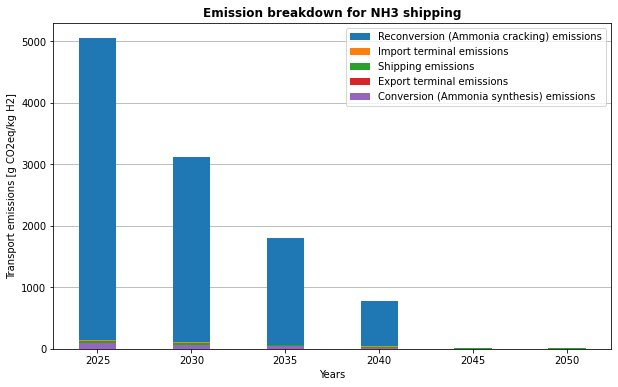

In [187]:
# Emission breakdown for NH3 seaborne transport
fig, ax = plt.subplots(figsize=(10, 6))
plt.grid(True, axis='y')
ax.set_axisbelow(True)
x = np.arange(2025, 2051, step=5)
CE = (con_em.loc[::5]['NH3_Conversion_emissions']).apply(pd.to_numeric)
EE = (et_em.loc[::5]['NH3_Export_terminal_emissions']).apply(pd.to_numeric)
SE = (ship_em.loc[::5]['NH3_Shipping_emissions']).apply(pd.to_numeric)
IE = (it_em.loc[::5]['NH3_Import_terminal_emissions']).apply(pd.to_numeric)
RE = (recon_em.loc[::5]['NH3_Reconversion_emissions']).apply(pd.to_numeric)
width = 2  # the width of the bars: can also be len(x) sequence

RE_plt = plt.bar(x, RE, width, label='Reconversion (Ammonia cracking) emissions', bottom=CE + EE + SE + IE)
IE_plt = plt.bar(x, IE, width, label='Import terminal emissions', bottom=CE + EE + SE)
SE_plt = plt.bar(x, SE, width, label='Shipping emissions', bottom=CE + EE)
EE_plt = plt.bar(x, EE, width, label='Export terminal emissions', bottom=CE)
CE_plt = plt.bar(x, CE, width, label='Conversion (Ammonia synthesis) emissions')

plt.title('Emission breakdown for NH3 shipping', fontweight='bold')
plt.legend(loc='upper right')
plt.ylabel('Transport emissions [g CO2eq/kg H2]')
plt.xlabel('Years')
plt.show()

Largest contributer is reconversion at around 15 kWh/kg H2 are required to crack ammonia and it is assumed that electricity and heat are sourced from grid electricity, which has a high emission factor of around 300 g CO2eq/kWh in 2025 (in Germany).